# Cleaning some financial data#
---

## [Osman Chaudhary](https://illesial.github.io)


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import re
import datetime as dt

Next, we'll load our data into a pandas dataframe df using `pd.read_csv()`. The data is available in `Anothertest-master\\tda18may.csv`.

In [3]:
df=pd.read_csv('Anothertest-master\\tda18may.csv')

Next, we'll inspect the data using `df.head()` and `df.info()`:

In [4]:
df.head()

,Customer,Trans_Date,Amount,Industry Code,DMA Code,Gender
0,"331,111,347,018",12/17/2018,17.6,6961,1,M
1,"37,977,867,004",12/17/2018,18.9,101,1,M
2,"4,383,462,017",12/17/2018,20,3891,1,M
3,"825,419,827,019",12/17/2018,28.29,101,1,U
4,"821,588,923,020",12/17/2018,2.37,5231,1,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
Customer         290 non-null object
Trans_Date       290 non-null object
Amount           290 non-null object
Industry Code    290 non-null int64
DMA Code         290 non-null int64
Gender           290 non-null object
dtypes: int64(2), object(4)
memory usage: 9.1+ KB


It Looks like none of the data is null, so we don't have to drop any rows. We should clean some of the columns up, however. The `Trans_Date` column should be conveted to a DateTimeIndex, the commas should be dropped from the `Customer` column, and the type of `Amount` should be `float`. 

In [6]:
df['Trans_Date'] = pd.to_datetime(df['Trans_Date'])

In [7]:
df['Customer']=df['Customer'].apply(lambda x: re.sub(',', '', x))

It turns out there are also commas that need to be dropped from the `Amount` column. Therefore we `.apply()` to this column a lambda function which removes the commas (using the regular expressions package `re`), and converts each entry to a `float`:

In [8]:
df['Amount']=df['Amount'].apply(lambda x: float(re.sub(',', '', x)))

Let's take a look at our data again using `df.head()`:

In [9]:
df.head()

,Customer,Trans_Date,Amount,Industry Code,DMA Code,Gender
0,331111347018,2018-12-17,17.60,6961,1,M
1,37977867004,2018-12-17,18.90,101,1,M
2,4383462017,2018-12-17,20.00,3891,1,M
3,825419827019,2018-12-17,28.29,101,1,U
4,821588923020,2018-12-17,2.37,5231,1,M


It may be useful later to remap the `Gender` column to numerical values. We'll set M, F, and U to 0, 1, and 2 respectively by defining the following dictionary `gender_map`, and then applying this dictionary to the `Gender` column using a lambda function:

In [10]:
gender_map = {'M': 0, 'F': 1, 'U':2}

In [11]:
df['Gender']=df['Gender'].apply(lambda x: gender_map[x])

Let's inspect the `Customer`, `Industry Code`, and `DMA Code` columns to see if there are any repeat values, using `pd.value_counts()`:

In [12]:
df['Customer'].value_counts().head()

147165773020    10
23976798020      8
24386790013      7
27360656016      7
719651232017     6
Name: Customer, dtype: int64

In [13]:
df['Industry Code'].value_counts().head()

9861    28
101     27
1701    16
3971    14
5181    10
Name: Industry Code, dtype: int64

In [14]:
df['DMA Code'].value_counts()

1       141
5011    136
5001     13
Name: DMA Code, dtype: int64

Looks like there are repeat values for all three of these columns. In particular, there are only three unique `DMA Code` values.

Let's proceed by calculating the total amount spent for each customer. We'll do this by using `df.groupby()`; we'll group by the `Customer` column, and aggregate using `.agg()`. We'll aggregate the `Amount` column, via the `sum()` function. Finally we'll sort the result by the `Amount` column in descending order, and get the values using `.values`. The result is stored in the variable `customer_amounts`. 

In [15]:
customer_amounts=df.groupby('Customer').agg({'Amount': lambda x: sum(x)}).sort_values(by='Amount', ascending = False).values

Let's look at the top 5 customer amounts by "slicing" the array (the part where I subset by using `[:5]`):

In [16]:
customer_amounts[:5]

array([[9294.36],
       [3753.26],
       [2854.4 ],
       [2358.19],
       [2175.14]])

Next we'll plot the customer amounts using `plt.plot()` and `plt.hist()`. In the first plot, the vertical axis is dollars and the horizontal axis is just the customer index (just a meaningless label here).

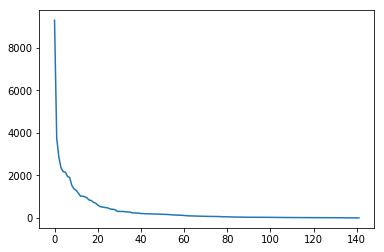

In [17]:
plt.clf()
plt.plot(customer_amounts)
plt.show()

Next we have a histogram. The horizontal axis is bins of dollar ranges and the vertical axis is the number of occurences in that range.

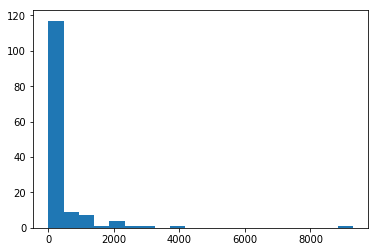

In [18]:
plt.clf()
plt.hist(customer_amounts, bins = 20)
plt.show()

Finally we'll take a closer look at the transactions under 500 Dollars. We'll do this by turning the numpy array customer_amounts into a pandas series, then subset it by only choosing those values under 500. Finally we'll plot the histogram.

In [19]:
customer_amounts_series=pd.Series(customer_amounts.flatten())

In [20]:
customer_amounts_under_500 = customer_amounts_series[customer_amounts_series < 500]

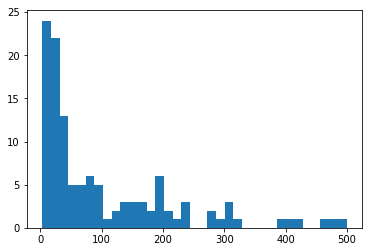

In [21]:
plt.clf()
plt.hist(customer_amounts_under_500, bins = 35)
plt.show()